In [1]:
import sys
sys.path.append("../..")

import helper as hlp
import pandas as pd
import numpy as np

[nltk_data] Downloading package stopwords to C:\Users\Abdul
[nltk_data]     Manaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
EPOCHS = 50
MAX_LEN = 30
N_CLASSES = 2
BATCH_SIZE = 256
LEARNING_RATE = 2e-5
NAME = 'distel(roberta)-combined'
MODEL_NAME = 'distilroberta-base'
dir = '../../../Dataset Statistics/dataset'
path = f'../saved_models/{NAME}'

In [3]:
train_df = pd.read_csv(f'{dir}/train.csv')
val_df = pd.read_csv(f'{dir}/val.csv')
test_df = pd.read_csv(f'{dir}/test.csv')

english_train_texts = train_df['english_text'].values
english_val_texts = val_df['english_text'].values
english_test_texts = test_df['english_text'].values

english_train_labels = train_df['class'].values
english_val_labels = val_df['class'].values
english_test_labels = test_df['class'].values

urdu_train_texts = train_df['urdu_text'].values
urdu_val_texts = val_df['urdu_text'].values
urdu_test_texts = test_df['urdu_text'].values

urdu_train_labels = train_df['class'].values
urdu_val_labels = val_df['class'].values
urdu_test_labels = test_df['class'].values

sindhi_train_texts = train_df['sindhi_text'].values
sindhi_val_texts = val_df['sindhi_text'].values
sindhi_test_texts = test_df['sindhi_text'].values

sindhi_train_labels = train_df['class'].values
sindhi_val_labels = val_df['class'].values
sindhi_test_labels = test_df['class'].values

english_train_texts = [hlp.preprocess_text(text, language="english") for text in english_train_texts]
english_val_texts = [hlp.preprocess_text(text, language="english") for text in english_val_texts]
english_test_texts = [hlp.preprocess_text(text, language="english") for text in english_test_texts]

urdu_train_texts = [hlp.preprocess_text(text, language="urdu") for text in urdu_train_texts]
urdu_val_texts = [hlp.preprocess_text(text, language="urdu") for text in urdu_val_texts]
urdu_test_texts = [hlp.preprocess_text(text, language="urdu") for text in urdu_test_texts]

sindhi_train_texts = [hlp.preprocess_text(text, language="sindhi") for text in sindhi_train_texts]
sindhi_val_texts = [hlp.preprocess_text(text, language="sindhi") for text in sindhi_val_texts]
sindhi_test_texts = [hlp.preprocess_text(text, language="sindhi") for text in sindhi_test_texts]

# Concatenate text arrays
train_texts = np.concatenate([english_train_texts, urdu_train_texts, sindhi_train_texts])
val_texts = np.concatenate([english_val_texts, urdu_val_texts, sindhi_val_texts])
test_texts = np.concatenate([english_test_texts, urdu_test_texts, sindhi_test_texts])

# Concatenate label arrays
train_labels = np.concatenate([english_train_labels, urdu_train_labels, sindhi_train_labels])
val_labels = np.concatenate([english_val_labels, urdu_val_labels, sindhi_val_labels])
test_labels = np.concatenate([english_test_labels, urdu_test_labels, sindhi_test_labels])

In [4]:
#shuffle data
train_texts, train_labels = hlp.shuffle_data(train_texts, train_labels)
val_texts, val_labels = hlp.shuffle_data(val_texts, val_labels)
test_texts, test_labels = hlp.shuffle_data(test_texts, test_labels)

In [5]:
#show 5 values along with their labels
for i in range(5):
    print(train_texts[i], train_labels[i])

christi86051122 lukeinsoco stfu dumbass ڪچي ڪجهه عزت ڏيکاريو 1
کچھ سالوں سے بزرگ طومار؟ 0
وہاناسای بی جی جی جی ایس سی ٹیبی نے لکھا پارک سے لکھا جو مسلمانوں نفرت کا سب سے بڑا ذریعہ ہے، جیسا مسلمانوں نے اسلام آباد میں شدید نفرت کا اظہار کیا سڑکوں مسلمانوں سے نفرت کا اظہار کیا 1
بس ڏٺو انگلينڊ جي مداحن جي وڊيو ڳائيندي نه هٿيار ڦٽا ڇا ڏهاڪي اڳ ختم ٿيل هٿيارن کان واقف نه 0
reaitrumpnews lot us shadowbanned 0


In [6]:
## mbert model and tokenizer
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = AutoTokenizer.from_pretrained("distilroberta-base")
model = AutoModelForSequenceClassification.from_pretrained("distilroberta-base", num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)

c:\Users\Abdul Manaf\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\utils\_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [7]:
train_data_loader = hlp.create_data_loader(train_texts, np.array(train_labels), tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = hlp.create_data_loader(val_texts, np.array(val_labels), tokenizer, MAX_LEN, BATCH_SIZE)

history = hlp.train_model(train_data_loader, val_data_loader, model, optimizer, device, EPOCHS, tokenizer, path)

Epoch 1/50
----------


Training Progress: 100%|██████████| 926/926 [04:36<00:00,  3.35it/s, loss=0.345]


Train loss 0.3934746775011779 accuracy 0.7966510104782523
Validation loss 0.3436531006904096 accuracy 0.8309786048866945
Model and tokenizer saved at epoch 1
Checkpoint saved: Improved validation accuracy at epoch 1: 0.8309786048866945
Metrics logged at epoch 1
Epoch 2/50
----------


Training Progress: 100%|██████████| 926/926 [04:36<00:00,  3.35it/s, loss=0.334]


Train loss 0.33631405305141504 accuracy 0.8323353040718751
Validation loss 0.33186149008837335 accuracy 0.8410684896822382
Model and tokenizer saved at epoch 2
Checkpoint saved: Improved validation accuracy at epoch 2: 0.8410684896822382
Metrics logged at epoch 2
Epoch 3/50
----------


Training Progress: 100%|██████████| 926/926 [04:38<00:00,  3.33it/s, loss=0.314]


Train loss 0.31727627497448 accuracy 0.8426067764709855
Validation loss 0.31958768263603876 accuracy 0.8439802506646411
Model and tokenizer saved at epoch 3
Checkpoint saved: Improved validation accuracy at epoch 3: 0.8439802506646411
Metrics logged at epoch 3
Epoch 4/50
----------


Training Progress: 100%|██████████| 926/926 [04:37<00:00,  3.33it/s, loss=0.306]


Train loss 0.30285120576813207 accuracy 0.8500297509779843
Validation loss 0.32299488049880587 accuracy 0.8463349791112799
Model and tokenizer saved at epoch 4
Checkpoint saved: Improved validation accuracy at epoch 4: 0.8463349791112799
Metrics logged at epoch 4
Epoch 5/50
----------


Training Progress: 100%|██████████| 926/926 [04:38<00:00,  3.33it/s, loss=0.288]


Train loss 0.28984033449937147 accuracy 0.8576637253288433
Validation loss 0.3259963453973381 accuracy 0.847449044182808
Model and tokenizer saved at epoch 5
Checkpoint saved: Improved validation accuracy at epoch 5: 0.847449044182808
Metrics logged at epoch 5
Epoch 6/50
----------


Training Progress: 100%|██████████| 926/926 [04:38<00:00,  3.32it/s, loss=0.267]


Train loss 0.2800692096030738 accuracy 0.8620525220811337
Validation loss 0.3289344403832476 accuracy 0.848423851120395
Model and tokenizer saved at epoch 6
Checkpoint saved: Improved validation accuracy at epoch 6: 0.848423851120395
Metrics logged at epoch 6
Epoch 7/50
----------


Training Progress: 100%|██████████| 926/926 [04:38<00:00,  3.32it/s, loss=0.258]


Train loss 0.27077313358080823 accuracy 0.8673486181620226
Validation loss 0.34094903741068056 accuracy 0.8468413723256109
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 7
Epoch 8/50
----------


Training Progress: 100%|██████████| 926/926 [04:38<00:00,  3.33it/s, loss=0.251]


Train loss 0.2619708429692116 accuracy 0.8717458549080674
Validation loss 0.33705859209341527 accuracy 0.8500949487276871
Model and tokenizer saved at epoch 8
Checkpoint saved: Improved validation accuracy at epoch 8: 0.8500949487276871
Metrics logged at epoch 8
Epoch 9/50
----------


Training Progress: 100%|██████████| 926/926 [04:36<00:00,  3.35it/s, loss=0.231]


Train loss 0.2541383449511188 accuracy 0.8757886119164272
Validation loss 0.3449637293815613 accuracy 0.851297632611723
Model and tokenizer saved at epoch 9
Checkpoint saved: Improved validation accuracy at epoch 9: 0.851297632611723
Metrics logged at epoch 9
Epoch 10/50
----------


Training Progress: 100%|██████████| 926/926 [04:37<00:00,  3.33it/s, loss=0.223]


Train loss 0.24736104136409306 accuracy 0.8792405693619787
Validation loss 0.3440313110652479 accuracy 0.8522344600582352
Model and tokenizer saved at epoch 10
Checkpoint saved: Improved validation accuracy at epoch 10: 0.8522344600582352
Metrics logged at epoch 10
Epoch 11/50
----------


Training Progress: 100%|██████████| 926/926 [04:38<00:00,  3.33it/s, loss=0.22] 


Train loss 0.2401734029242596 accuracy 0.8830301265577064
Validation loss 0.3509165039918955 accuracy 0.8527535131029245
Model and tokenizer saved at epoch 11
Checkpoint saved: Improved validation accuracy at epoch 11: 0.8527535131029245
Metrics logged at epoch 11
Epoch 12/50
----------


Training Progress: 100%|██████████| 926/926 [04:37<00:00,  3.33it/s, loss=0.235]


Train loss 0.2336032571629108 accuracy 0.8867395038127672
Validation loss 0.36387074596480645 accuracy 0.8500696290669705
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 12
Epoch 13/50
----------


Training Progress: 100%|██████████| 926/926 [04:37<00:00,  3.34it/s, loss=0.232]


Train loss 0.22699355453124057 accuracy 0.8896681816455456
Validation loss 0.3707021459888872 accuracy 0.8522977592100266
No improvement in validation accuracy for 2 epochs.
Metrics logged at epoch 13
Epoch 14/50
----------


Training Progress: 100%|██████████| 926/926 [04:38<00:00,  3.33it/s, loss=0.203]


Train loss 0.2205944218015053 accuracy 0.8924829195626396
Validation loss 0.3675283615064467 accuracy 0.8554120774781618
Model and tokenizer saved at epoch 14
Checkpoint saved: Improved validation accuracy at epoch 14: 0.8554120774781618
Metrics logged at epoch 14
Epoch 15/50
----------


Training Progress: 100%|██████████| 926/926 [04:36<00:00,  3.35it/s, loss=0.183]


Train loss 0.21491993579120408 accuracy 0.895850477070647
Validation loss 0.3770543975351698 accuracy 0.8544752500316496
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 15
Epoch 16/50
----------


Training Progress: 100%|██████████| 926/926 [04:37<00:00,  3.34it/s, loss=0.213]


Train loss 0.20894429251776916 accuracy 0.899082994678584
Validation loss 0.3848154614272627 accuracy 0.8520192429421446
No improvement in validation accuracy for 2 epochs.
Metrics logged at epoch 16
Epoch 17/50
----------


Training Progress: 100%|██████████| 926/926 [04:36<00:00,  3.35it/s, loss=0.205]


Train loss 0.20461068905841712 accuracy 0.9005895335637452
Validation loss 0.39553151899364003 accuracy 0.8536776807190783
No improvement in validation accuracy for 3 epochs.
Metrics logged at epoch 17
Epoch 18/50
----------


Training Progress: 100%|██████████| 926/926 [04:37<00:00,  3.34it/s, loss=0.199]


Train loss 0.19906027570817433 accuracy 0.90406681099056
Validation loss 0.3948841825561616 accuracy 0.8540448157994683
No improvement in validation accuracy for 4 epochs.
Metrics logged at epoch 18
Epoch 19/50
----------


Training Progress: 100%|██████████| 926/926 [04:37<00:00,  3.33it/s, loss=0.166]


Train loss 0.19493553921033188 accuracy 0.9064384492355476
Validation loss 0.4056775074174875 accuracy 0.8545132295227243
No improvement in validation accuracy for 5 epochs.
Stopping early due to lack of improvement in validation accuracy.


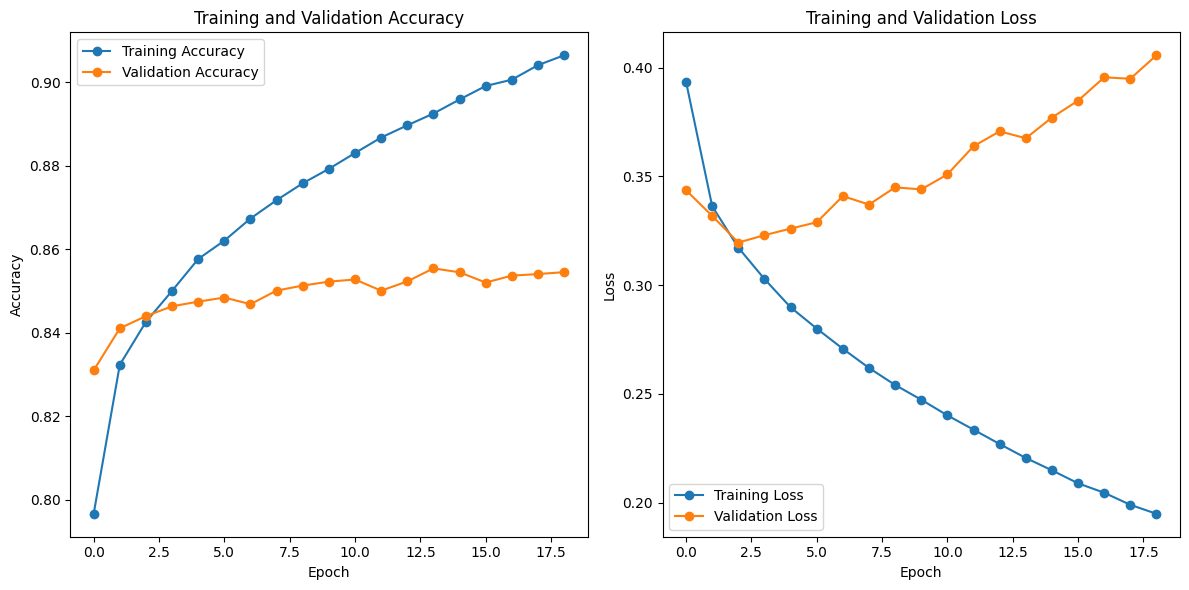

In [8]:
hlp.plot_history(history)

In [10]:
test_data_loader = hlp.create_data_loader(test_texts, np.array(test_labels), tokenizer, MAX_LEN, BATCH_SIZE)

test_acc, test_loss, test_label_actual, test_label_pred = hlp.eval_model(model, test_data_loader, device)

print(f'Test Accuracy: {test_acc} Test Loss: {test_loss}')

Test Accuracy: 0.8502342068616281 Test Loss: 0.4150566674744813


Accuracy: 0.85
F1 Score: 0.8
Precision: 0.77
Recall: 0.84

Classification Report:
              precision    recall  f1-score   support

    Non-Hate       0.90      0.86      0.88     50796
        Hate       0.77      0.84      0.80     28194

    accuracy                           0.85     78990
   macro avg       0.83      0.85      0.84     78990
weighted avg       0.85      0.85      0.85     78990



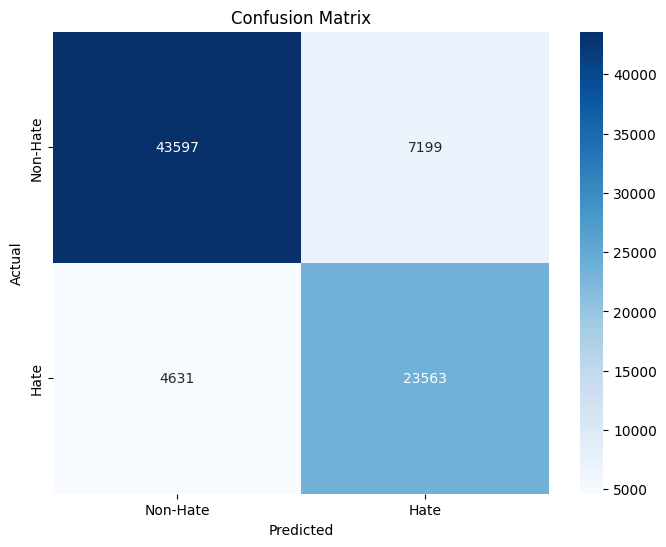

In [11]:
hlp.plot_confusion_matrix(test_label_actual, test_label_pred, ['Non-Hate', 'Hate'])

In [12]:
test_texts = ["This is the sort of thing that happens in a shithole country. @URL"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

if preds[0] == 1:
    print(f'Predicted class: Hate Speech \nConfidence: {confidence[0][1]:.2f}')
else:
    print(f'Predicted class: Not Hate Speech \nConfidence: {confidence[0][0]:.2f}')

Predicted class: Hate Speech 
Confidence: 0.96
